# Litos Cocina Pricing Project
- This project is being used to help decide what price offerings should be based on specific medium. 
- Litos Cocina is a Premium Mexican Spice and Drink company offering "Premium Ingredients in Perfect Proportions". They are currently only available online but are looking to move into physical store locations as well as Amazon. Using current spice data from other brands we can find around what price Litos should be offering its taco seasoning products specifically.

In [1]:
# Import needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Create dataframe which houses product data
product_details = pd.read_csv('Data/Litos Data Science Project.csv')

In [3]:
# Take a look at the data
product_details

,Food Name,Item Size (Grams),In Store Price,Amazon Prime Price,Amazon Non-Prime Price,Webstore Price (No Shipping)
0,Jacobsen Garlic Salt Jar,96,7.98,12.48,15.10,11.00
1,Real Salt Shaker,284,4.48,9.82,9.82,6.35
2,FalkSalt Crystal Flakes Natural Sea Salt,250,4.58,5.97,5.97,6.99
3,Natierra Himalania Pink Salt Flakes,241,7.68,9.65,9.65,8.99
4,2 Gringos Chupacabra Ribnoxious Rub,326,8.88,13.99,13.99,9.99
5,Kevins All Purpose Paleo Keto Seasoning,142,5.48,6.67,6.67,6.50
6,Kevins Natural Foods Taco Seasoning,100,5.49,6.67,6.67,6.50
7,Lawrys Lemon Pepper,127,4.08,7.18,7.18,4.93
8,Franklin Barbecue Spice Rub,326,9.98,NaN,NaN,9.67
9,Salt Lick Spice Dry Rub Garlic,240,5.48,6.58,6.58,7.31


In [4]:
# Drop the rows with null values as that will not help our analysis since we are trying to predict what prices should be in different domains.
# Reset the index since I removed rows. 
product_details = product_details.dropna(axis=0).reset_index().drop(columns = 'index')
product_details

,Food Name,Item Size (Grams),In Store Price,Amazon Prime Price,Amazon Non-Prime Price,Webstore Price (No Shipping)
0,Jacobsen Garlic Salt Jar,96,7.98,12.48,15.10,11.00
1,Real Salt Shaker,284,4.48,9.82,9.82,6.35
2,FalkSalt Crystal Flakes Natural Sea Salt,250,4.58,5.97,5.97,6.99
3,Natierra Himalania Pink Salt Flakes,241,7.68,9.65,9.65,8.99
4,2 Gringos Chupacabra Ribnoxious Rub,326,8.88,13.99,13.99,9.99
5,Kevins All Purpose Paleo Keto Seasoning,142,5.48,6.67,6.67,6.50
6,Kevins Natural Foods Taco Seasoning,100,5.49,6.67,6.67,6.50
7,Lawrys Lemon Pepper,127,4.08,7.18,7.18,4.93
8,Salt Lick Spice Dry Rub Garlic,240,5.48,6.58,6.58,7.31
9,Truff Hot Sauce,170,15.79,13.30,14.86,15.28


In [5]:
# Get a high level understanding of the different columns and their spread. 
product_details.describe()

,Item Size (Grams),In Store Price,Amazon Prime Price,Amazon Non-Prime Price,Webstore Price (No Shipping)
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,182.454545,6.854545,8.846364,9.226364,8.302727
std,91.813249,3.345640,3.186585,3.770788,2.904035
min,31.000000,4.080000,5.000000,5.000000,4.930000
25%,113.500000,5.030000,6.625000,6.625000,6.500000
50%,170.000000,5.480000,7.180000,7.180000,7.310000
75%,245.500000,7.830000,11.150000,11.905000,9.490000
max,326.000000,15.790000,13.990000,15.100000,15.280000


# Create columns that calculate price per gram for each type of price offering.

In [6]:
for column_name in product_details.columns[2:]:
    product_details[column_name + '_per_gram'] = product_details[column_name] / product_details['Item Size (Grams)']

# Check my work and make sure columns were correctly created.
product_details

,Food Name,Item Size (Grams),In Store Price,Amazon Prime Price,Amazon Non-Prime Price,Webstore Price (No Shipping),In Store Price_per_gram,Amazon Prime Price_per_gram,Amazon Non-Prime Price_per_gram,Webstore Price (No Shipping)_per_gram
0,Jacobsen Garlic Salt Jar,96,7.98,12.48,15.10,11.00,0.083125,0.130000,0.157292,0.114583
1,Real Salt Shaker,284,4.48,9.82,9.82,6.35,0.015775,0.034577,0.034577,0.022359
2,FalkSalt Crystal Flakes Natural Sea Salt,250,4.58,5.97,5.97,6.99,0.018320,0.023880,0.023880,0.027960
3,Natierra Himalania Pink Salt Flakes,241,7.68,9.65,9.65,8.99,0.031867,0.040041,0.040041,0.037303
4,2 Gringos Chupacabra Ribnoxious Rub,326,8.88,13.99,13.99,9.99,0.027239,0.042914,0.042914,0.030644
5,Kevins All Purpose Paleo Keto Seasoning,142,5.48,6.67,6.67,6.50,0.038592,0.046972,0.046972,0.045775
6,Kevins Natural Foods Taco Seasoning,100,5.49,6.67,6.67,6.50,0.054900,0.066700,0.066700,0.065000
7,Lawrys Lemon Pepper,127,4.08,7.18,7.18,4.93,0.032126,0.056535,0.056535,0.038819
8,Salt Lick Spice Dry Rub Garlic,240,5.48,6.58,6.58,7.31,0.022833,0.027417,0.027417,0.030458
9,Truff Hot Sauce,170,15.79,13.30,14.86,15.28,0.092882,0.078235,0.087412,0.089882


# Create a barplot showing the Price Per Gram for each brand given the specific medium.

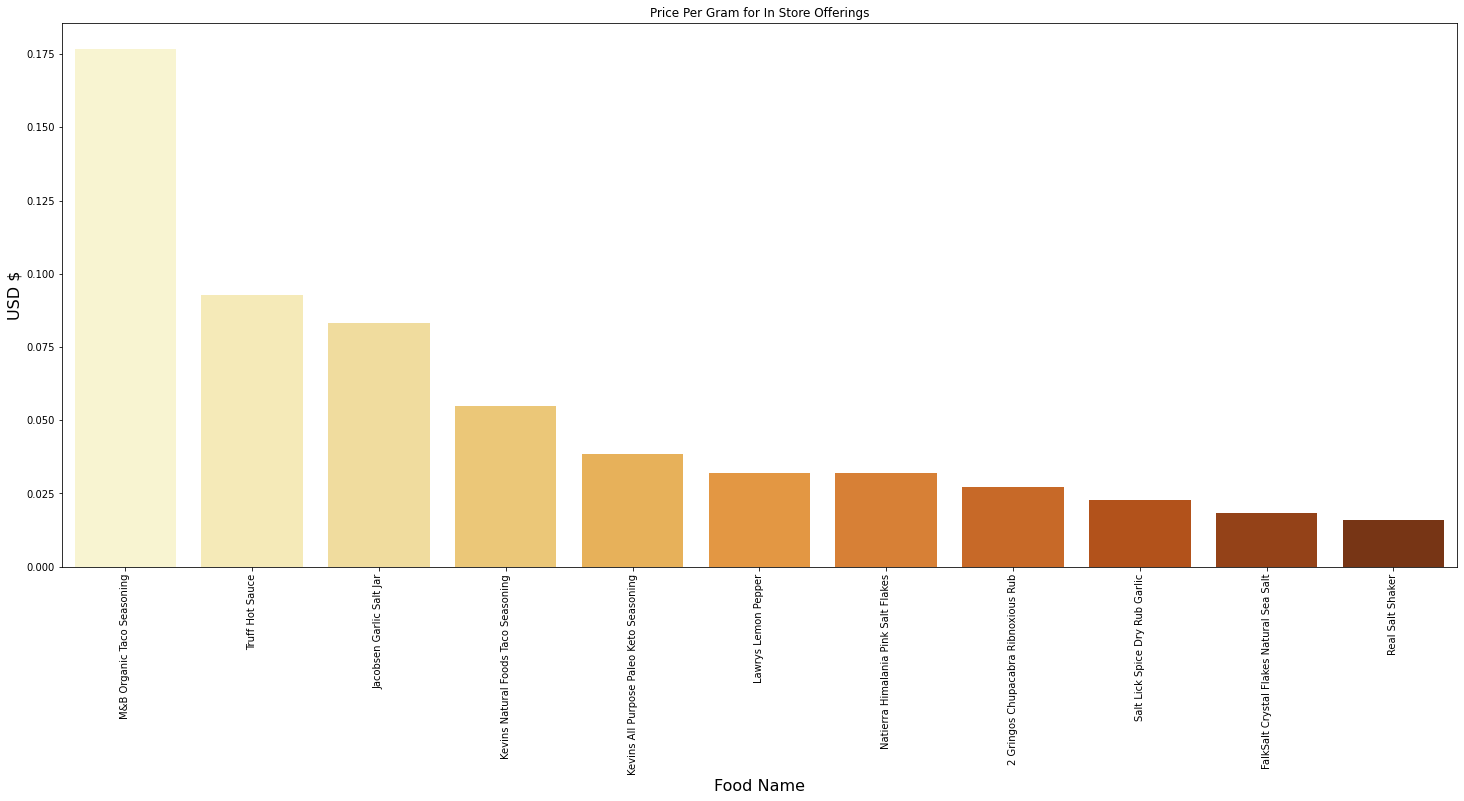

In [20]:
plt.figure(figsize=(25,10))
in_store_chart = sns.barplot(x=product_details['Food Name'], y= product_details['In Store Price_per_gram'], 
            order=product_details.sort_values('In Store Price_per_gram', ascending =False)['Food Name'], palette = "YlOrBr")

for item in in_store_chart.get_xticklabels():
    item.set_rotation(90)
    
plt.xlabel("Food Name", size=16)
plt.ylabel("USD $", size=16)
plt.title("Price Per Gram for In Store Offerings")

    
plt.show()

- I am surprised with how expensive M&B Organic Taco Seasoning is when Truff is actually positioned as a luxury food product. I would have expected truff to be the most expensive in every category. This gives me a lot of confidence that Litos has plenty of space to position itself, price wise, to correspond with its premium branding and offerings.

In [8]:
# See what product is most expensive per gram for in store
product_details[['Food Name','In Store Price_per_gram']].sort_values('In Store Price_per_gram', ascending = False)

,Food Name,In Store Price_per_gram
10,M&B Organic Taco Seasoning,0.176774
9,Truff Hot Sauce,0.092882
0,Jacobsen Garlic Salt Jar,0.083125
6,Kevins Natural Foods Taco Seasoning,0.054900
5,Kevins All Purpose Paleo Keto Seasoning,0.038592
7,Lawrys Lemon Pepper,0.032126
3,Natierra Himalania Pink Salt Flakes,0.031867
4,2 Gringos Chupacabra Ribnoxious Rub,0.027239
8,Salt Lick Spice Dry Rub Garlic,0.022833
2,FalkSalt Crystal Flakes Natural Sea Salt,0.018320


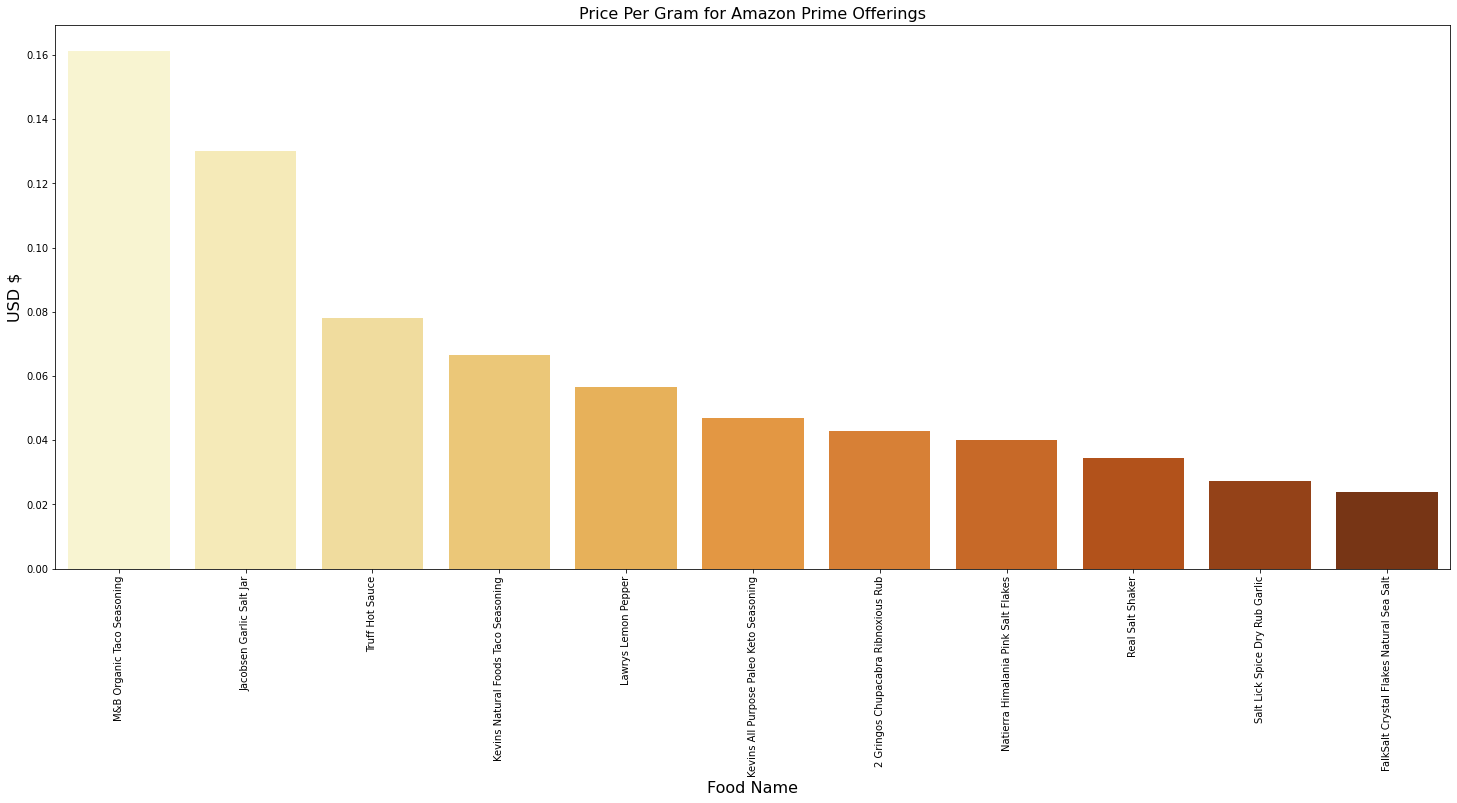

In [21]:
plt.figure(figsize=(25,10))
amzn_store_chart = sns.barplot(x=product_details['Food Name'], y= product_details['Amazon Prime Price_per_gram'], 
            order=product_details.sort_values('Amazon Prime Price_per_gram', ascending =False)['Food Name'], palette = "YlOrBr")

for item in amzn_store_chart.get_xticklabels():
    item.set_rotation(90)
    
plt.xlabel("Food Name", size=16)
plt.ylabel("USD $", size=16)
plt.title("Price Per Gram for Amazon Prime Offerings", size = 16)
    
plt.show()

In [10]:
# See what product is most expensive per gram for Amazon Prime
product_details[['Food Name','Amazon Prime Price_per_gram']].sort_values('Amazon Prime Price_per_gram', ascending = False)

,Food Name,Amazon Prime Price_per_gram
10,M&B Organic Taco Seasoning,0.161290
0,Jacobsen Garlic Salt Jar,0.130000
9,Truff Hot Sauce,0.078235
6,Kevins Natural Foods Taco Seasoning,0.066700
7,Lawrys Lemon Pepper,0.056535
5,Kevins All Purpose Paleo Keto Seasoning,0.046972
4,2 Gringos Chupacabra Ribnoxious Rub,0.042914
3,Natierra Himalania Pink Salt Flakes,0.040041
1,Real Salt Shaker,0.034577
8,Salt Lick Spice Dry Rub Garlic,0.027417


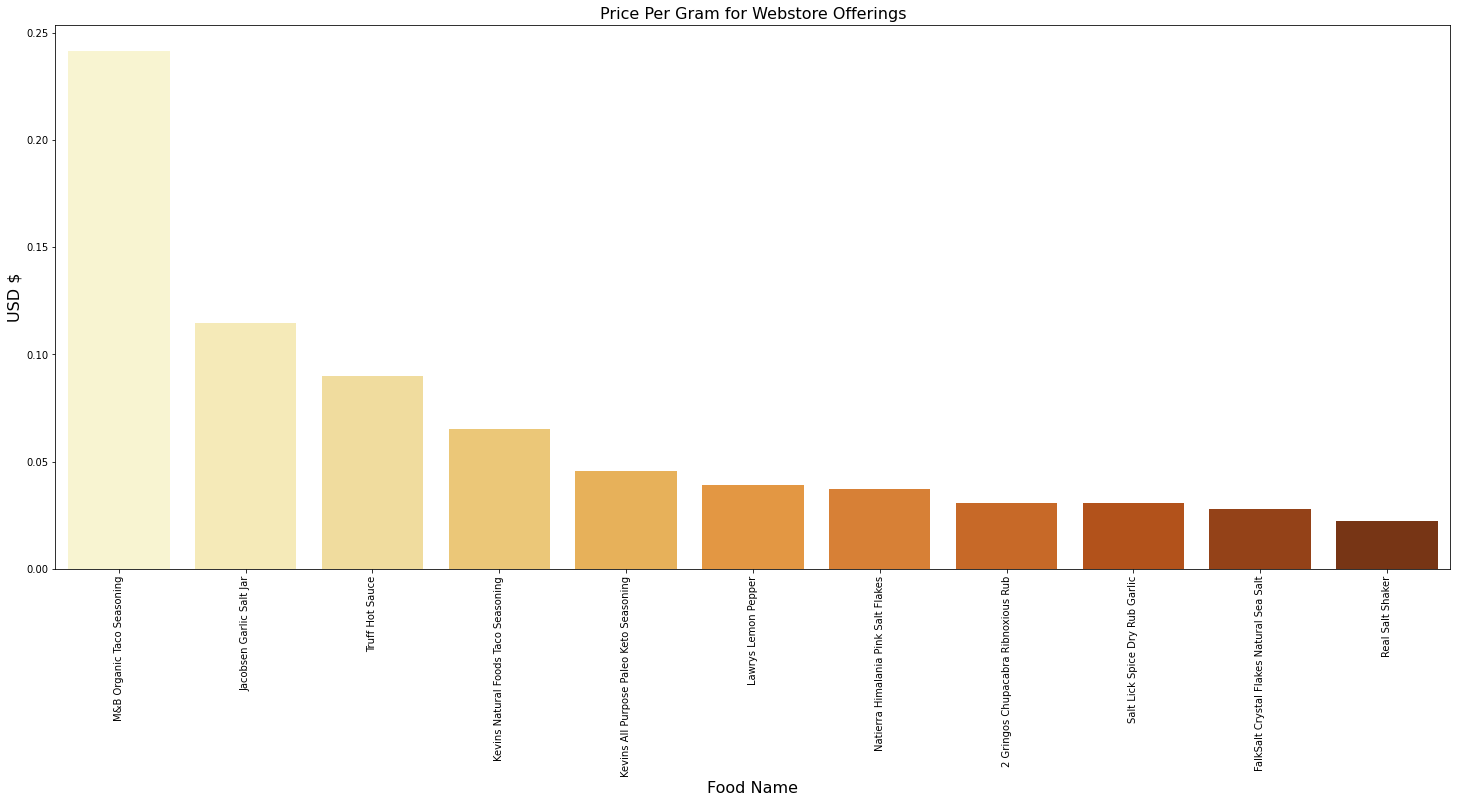

In [22]:
plt.figure(figsize=(25,10))
webstore_store_chart = sns.barplot(x=product_details['Food Name'], y= product_details['Webstore Price (No Shipping)_per_gram'], 
            order=product_details.sort_values('Webstore Price (No Shipping)_per_gram', ascending =False)['Food Name'], palette = "YlOrBr")

for item in webstore_store_chart.get_xticklabels():
    item.set_rotation(90)
    
plt.xlabel("Food Name", size=16)
plt.ylabel("USD $", size=16)
plt.title("Price Per Gram for Webstore Offerings", size = 16)
    
plt.show()

 - We see that M&B Organic Taco Seasoning is by far the most expensive per gram and there is no real close second place product. Litos may find success in being a closer second place position since we are a premium brand with premium products

In [12]:
# See what product is most expensive per gram for Webstore offering
product_details[['Food Name','Webstore Price (No Shipping)_per_gram']].sort_values('Webstore Price (No Shipping)_per_gram', ascending = False)

,Food Name,Webstore Price (No Shipping)_per_gram
10,M&B Organic Taco Seasoning,0.241613
0,Jacobsen Garlic Salt Jar,0.114583
9,Truff Hot Sauce,0.089882
6,Kevins Natural Foods Taco Seasoning,0.065000
5,Kevins All Purpose Paleo Keto Seasoning,0.045775
7,Lawrys Lemon Pepper,0.038819
3,Natierra Himalania Pink Salt Flakes,0.037303
4,2 Gringos Chupacabra Ribnoxious Rub,0.030644
8,Salt Lick Spice Dry Rub Garlic,0.030458
2,FalkSalt Crystal Flakes Natural Sea Salt,0.027960


In [13]:
product_details.head()

,Food Name,Item Size (Grams),In Store Price,Amazon Prime Price,Amazon Non-Prime Price,Webstore Price (No Shipping),In Store Price_per_gram,Amazon Prime Price_per_gram,Amazon Non-Prime Price_per_gram,Webstore Price (No Shipping)_per_gram
0,Jacobsen Garlic Salt Jar,96,7.98,12.48,15.10,11.00,0.083125,0.130000,0.157292,0.114583
1,Real Salt Shaker,284,4.48,9.82,9.82,6.35,0.015775,0.034577,0.034577,0.022359
2,FalkSalt Crystal Flakes Natural Sea Salt,250,4.58,5.97,5.97,6.99,0.018320,0.023880,0.023880,0.027960
3,Natierra Himalania Pink Salt Flakes,241,7.68,9.65,9.65,8.99,0.031867,0.040041,0.040041,0.037303
4,2 Gringos Chupacabra Ribnoxious Rub,326,8.88,13.99,13.99,9.99,0.027239,0.042914,0.042914,0.030644


# Create ratio comparing all prices to Webstore price
 - These ratios will be used to help figure out what Litos should be pricing its taco seasoning products

In [14]:
for column_name in product_details.columns[2:6]:
    product_details[column_name + ' vs Webstore Price'] = product_details[column_name] / product_details['Webstore Price (No Shipping)']

# Check my work
product_details


,Food Name,Item Size (Grams),In Store Price,Amazon Prime Price,Amazon Non-Prime Price,Webstore Price (No Shipping),In Store Price_per_gram,Amazon Prime Price_per_gram,Amazon Non-Prime Price_per_gram,Webstore Price (No Shipping)_per_gram,In Store Price vs Webstore Price,Amazon Prime Price vs Webstore Price,Amazon Non-Prime Price vs Webstore Price,Webstore Price (No Shipping) vs Webstore Price
0,Jacobsen Garlic Salt Jar,96,7.98,12.48,15.10,11.00,0.083125,0.130000,0.157292,0.114583,0.725455,1.134545,1.372727,1.0
1,Real Salt Shaker,284,4.48,9.82,9.82,6.35,0.015775,0.034577,0.034577,0.022359,0.705512,1.546457,1.546457,1.0
2,FalkSalt Crystal Flakes Natural Sea Salt,250,4.58,5.97,5.97,6.99,0.018320,0.023880,0.023880,0.027960,0.655222,0.854077,0.854077,1.0
3,Natierra Himalania Pink Salt Flakes,241,7.68,9.65,9.65,8.99,0.031867,0.040041,0.040041,0.037303,0.854283,1.073415,1.073415,1.0
4,2 Gringos Chupacabra Ribnoxious Rub,326,8.88,13.99,13.99,9.99,0.027239,0.042914,0.042914,0.030644,0.888889,1.400400,1.400400,1.0
5,Kevins All Purpose Paleo Keto Seasoning,142,5.48,6.67,6.67,6.50,0.038592,0.046972,0.046972,0.045775,0.843077,1.026154,1.026154,1.0
6,Kevins Natural Foods Taco Seasoning,100,5.49,6.67,6.67,6.50,0.054900,0.066700,0.066700,0.065000,0.844615,1.026154,1.026154,1.0
7,Lawrys Lemon Pepper,127,4.08,7.18,7.18,4.93,0.032126,0.056535,0.056535,0.038819,0.827586,1.456389,1.456389,1.0
8,Salt Lick Spice Dry Rub Garlic,240,5.48,6.58,6.58,7.31,0.022833,0.027417,0.027417,0.030458,0.749658,0.900137,0.900137,1.0
9,Truff Hot Sauce,170,15.79,13.30,14.86,15.28,0.092882,0.078235,0.087412,0.089882,1.033377,0.870419,0.972513,1.0


# EDA related to prices

In [15]:
# find the descriptive statistics of comparison columns. 
product_details.iloc[:,-4:-1].describe()

,In Store Price vs Webstore Price,Amazon Prime Price vs Webstore Price,Amazon Non-Prime Price vs Webstore Price
count,11.000000,11.000000,11.000000
mean,0.805392,1.086882,1.117816
std,0.105949,0.277061,0.283331
min,0.655222,0.667557,0.667557
25%,0.728548,0.885278,0.936325
50%,0.827586,1.026154,1.026154
75%,0.849449,1.267473,1.386564
max,1.033377,1.546457,1.546457


# Now we begin to utlize the averages for each ratio in order to calculate how litos should price its products in new locations.

In [16]:
# Find Litos price for Amazon, Amazon Non-Prime, In-Store Price
data = {'Food Name': ['Litos Taco Seasoning'], 'Item Size (Grams)': [115], 'Webstore Price (No Shipping)': [10.0]}

litos_df = pd.DataFrame(data)

litos_df.head()

,Food Name,Item Size (Grams),Webstore Price (No Shipping)
0,Litos Taco Seasoning,115,10.0


In [17]:
# Create a new column calculating the potential in Store price utilizing the webstore price and webstore price vs in store price
litos_df['Potential_In_Store_Price'] = litos_df['Webstore Price (No Shipping)'] * product_details['In Store Price vs Webstore Price'].mean()
litos_df

,Food Name,Item Size (Grams),Webstore Price (No Shipping),Potential_In_Store_Price
0,Litos Taco Seasoning,115,10.0,8.053923


In [18]:
# Create a new column calculating a potential amazon prime price
litos_df['Potential_Amazon_Prime_Price'] = litos_df['Webstore Price (No Shipping)'] * product_details['Amazon Prime Price vs Webstore Price'].mean()
litos_df

,Food Name,Item Size (Grams),Webstore Price (No Shipping),Potential_In_Store_Price,Potential_Amazon_Prime_Price
0,Litos Taco Seasoning,115,10.0,8.053923,10.868822


In [19]:
# Create a new column calculating a potential amazon non-prime price
litos_df['Potential_Amazon_Non_Prime_Price'] = litos_df['Webstore Price (No Shipping)'] * product_details['Amazon Non-Prime Price vs Webstore Price'].mean()
litos_df

,Food Name,Item Size (Grams),Webstore Price (No Shipping),Potential_In_Store_Price,Potential_Amazon_Prime_Price,Potential_Amazon_Non_Prime_Price
0,Litos Taco Seasoning,115,10.0,8.053923,10.868822,11.178164


# We learned that Litos should be able to position itself has the 2nd or 3rd highest price per gram offering for the following 2 reasons:
    1. M&B Organic is by far the most expensive per gram and Litos is branded as more of a premium product so we can push closer to their price per gram since we want to make sure people associate our product as premium from appearance to price. 
    
    2. Litos needs to make sure it positions its products properly from the start. It is always easier to lower the price in the end if the niche market is not responding to the higher pricing but it is much more difficult to raise prices when there is no new value being added to the product. 
    